In [53]:
# Compute Premium Penetration for Aviation & Marine for all countries.
# Represent the calculated Premium penetration as a line chart with the option to select country as a filter. 
# Penetration = Premiums / GDP

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [26]:
insurance_data = pd.read_csv("C:\\Users\\gupta\\OneDrive\\Desktop\\excel\\insurance_csv.csv" )
insurance_data

,variable_id,variable_name,lob,Country,unit,comments,2001,2002,2003,2004,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,premiums,Premiums,aviation,ar,USD,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.663775e+07,3.302885e+07,3.621780e+07,3.341695e+07,3.446490e+07,2.953320e+07,NaN
1,premiums,Premiums,marine,ae,USD,Assumption based,NaN,NaN,NaN,NaN,...,NaN,1.050546e+08,1.219875e+08,1.291155e+08,1.427171e+08,1.487662e+08,1.480338e+08,1.091010e+08,NaN,NaN
2,premiums,Premiums,aviation,at,USD,NaN,NaN,3.440142e+07,3.491657e+07,2.872530e+07,...,2.173151e+07,1.911626e+07,1.554278e+07,1.127052e+07,1.036835e+07,1.179914e+07,1.086181e+07,1.059337e+07,NaN,NaN
3,premiums,Premiums,marine,ar,USD,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.221323e+07,2.593741e+07,2.609305e+07,2.571256e+07,2.666382e+07,2.291803e+07,NaN
4,premiums,Premiums,aviation,br,USD,NaN,87317721.27,1.196424e+08,1.429795e+08,1.250661e+08,...,1.035521e+08,2.095826e+08,1.822125e+08,1.814892e+08,2.168238e+08,2.004822e+08,2.188845e+08,1.797907e+08,1.962496e+08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,premiums,Premiums,marine,ve,USD,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.865644e+07,2.059823e+07,3.161090e+06,3.117205e+07,2.677126e+07,1.913442e+07,NaN,NaN
108,premiums,Premiums,aviation,ph,USD,Assumption based,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.186105e+07,3.686686e+07,4.213456e+07,4.432160e+07,4.975204e+07,NaN,NaN
109,premiums,Premiums,marine,za,USD,Assumption based,NaN,NaN,NaN,NaN,...,4.597945e+07,5.673010e+07,5.435688e+07,5.807755e+07,6.726274e+07,7.363522e+07,6.769948e+07,6.832217e+07,NaN,NaN
110,premiums,Premiums,aviation,za,USD,Assumption based,NaN,NaN,NaN,NaN,...,8.029859e+07,9.907354e+07,9.492894e+07,1.014267e+08,1.174678e+08,1.285967e+08,1.182305e+08,1.193179e+08,NaN,NaN


In [27]:
aviation_premium = insurance_data[(insurance_data['variable_name'] == 'Premiums') & (insurance_data['lob'] == 'aviation')]
print(pd.Series(aviation_premium['Country']).is_unique)
marine_premium = insurance_data[(insurance_data['variable_name'] == 'Premiums') & (insurance_data['lob'] == 'marine')]
print(pd.Series(marine_premium['Country']).is_unique)

True
True


In [28]:
# print(aviation_premium[aviation_premium['2001'].notna()])

In [29]:
macro_data = pd.read_csv("C:\\Users\\gupta\\OneDrive\\Desktop\\excel\\macro_csv.csv" )
macro_data.rename(columns={"iso2" : 'Country'} , inplace= True)
macro_data=macro_data[macro_data['variable_id']=='gdp']
macro_data= macro_data[macro_data['unit']=='USD']
# print(pd.Series(macro_data['Country']).is_unique)

In [30]:
# Define the function to calculate pen
def calculate_pen(premium_value, gdp_value):
    if premium_value > 0 and gdp_value > 0:
        return (premium_value / gdp_value)
    else:
        return None

In [31]:
aviation_pen_results = []
for countrya in aviation_premium['Country']:
    for countrym in macro_data['Country']:
        if (countrya == countrym):
            for i in range(2001, 2016):
                premium_value = aviation_premium[str(i)].values[0]
                gdp_value = macro_data[str(i)].values[0]
                if pd.notna(premium_value) and pd.notna(gdp_value):
                    pen = calculate_pen(premium_value , gdp_value)
                    if pen is not None:
                         aviation_pen_results.append({'Country': countrya, 'Year': i,'Premium': premium_value , 'GDP':gdp_value,'Penetration_Aviation': pen})

a_pen_df = pd.DataFrame(aviation_pen_results)
a_pen_df


,Country,Year,Premium,GDP,Penetration_Aviation
0,ar,2009,26637753.87,2.535470e+11,0.000105
1,ar,2010,33028849.42,2.860490e+11,0.000115
2,ar,2011,36217803.74,3.485260e+11,0.000104
3,ar,2012,33416954.59,3.734300e+11,0.000089
4,ar,2013,34464903.09,3.871390e+11,0.000089
...,...,...,...,...,...
283,za,2010,33028849.42,2.860490e+11,0.000115
284,za,2011,36217803.74,3.485260e+11,0.000104
285,za,2012,33416954.59,3.734300e+11,0.000089
286,za,2013,34464903.09,3.871390e+11,0.000089


In [32]:
X = a_pen_df[['GDP', 'Year']]
y = a_pen_df['Penetration_Aviation']

In [33]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [35]:
# Making predictions
y_pred = model.predict(X_test)

In [36]:
# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Absolute Error: 4.989342520803255e-06
R-squared: 0.8116522923458298


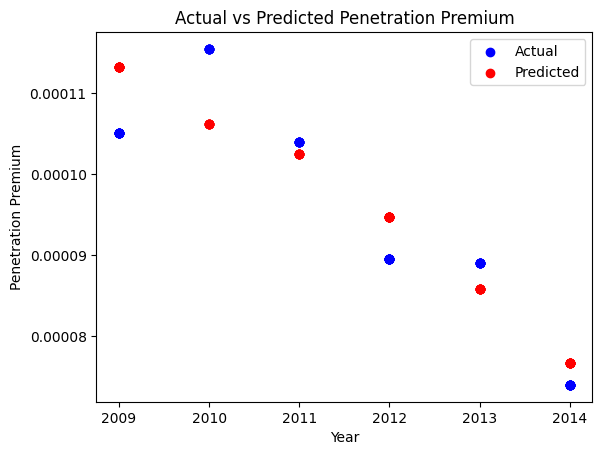

In [37]:
# Plotting the results
plt.scatter(X_test['Year'], y_test, color='blue', label='Actual')
plt.scatter(X_test['Year'], y_pred, color='red', label='Predicted')
plt.xlabel('Year')
plt.ylabel('Penetration Premium')
plt.title('Actual vs Predicted Penetration Premium')
plt.legend()
plt.show()

In [38]:
# Making future predictions (example scenario)
future_data = pd.DataFrame({
    'GDP': [2000],  # Example future GDP value
    'Year': [2020]  # Example future year
})
future_prediction = model.predict(future_data)
print(f'Future Penetration Premium Prediction for 2025: {future_prediction[0]}')

Future Penetration Premium Prediction for 2025: -2.8616075042932343e-05


In [39]:
marine_pen_results = []
for countrya in marine_premium['Country']:
    for countrym in macro_data['Country']:
        if (countrya == countrym):
            for i in range(2001, 2016):
                premium_value = marine_premium[str(i)].values[0]
                gdp_value = macro_data[str(i)].values[0]
                if pd.notna(premium_value) and pd.notna(gdp_value):
                    pen = calculate_pen(premium_value , gdp_value)
                    if pen is not None:
                         marine_pen_results.append({'Country': countrya, 'Year': i,'Premium': premium_value , 'GDP':gdp_value, 'Penetration_Marine': pen})

m_pen_df = pd.DataFrame(marine_pen_results)
m_pen_df

,Country,Year,Premium,GDP,Penetration_Marine
0,ae,2007,105054647.3,2.579160e+11,0.000407
1,ae,2008,121987500.5,3.154750e+11,0.000387
2,ae,2009,129115453.2,2.535470e+11,0.000509
3,ae,2010,142717091.4,2.860490e+11,0.000499
4,ae,2011,148766208.5,3.485260e+11,0.000427
...,...,...,...,...,...
352,za,2009,129115453.2,2.535470e+11,0.000509
353,za,2010,142717091.4,2.860490e+11,0.000499
354,za,2011,148766208.5,3.485260e+11,0.000427
355,za,2012,148033750.3,3.734300e+11,0.000396


In [40]:
X = m_pen_df[['GDP', 'Year']]
y = m_pen_df['Penetration_Marine']

In [41]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [43]:
# Making predictions
y_pred = model.predict(X_test)

In [44]:
# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Absolute Error: 3.4085438043076e-05
R-squared: 0.6479998062353451


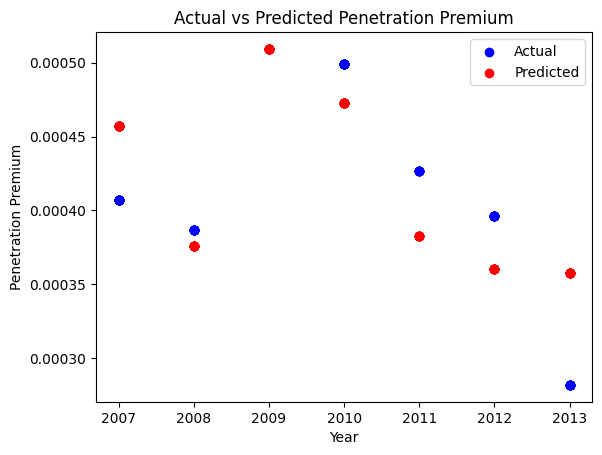

In [45]:
# Plotting the results
plt.scatter(X_test['Year'], y_test, color='blue', label='Actual')
plt.scatter(X_test['Year'], y_pred, color='red', label='Predicted')
plt.xlabel('Year')
plt.ylabel('Penetration Premium')
plt.title('Actual vs Predicted Penetration Premium')
plt.legend()
plt.show()

In [46]:
# Making future predictions (example scenario)
future_data = pd.DataFrame({
    'GDP': [2000],  # Example future GDP value
    'Year': [2020]  # Example future year
})
future_prediction = model.predict(future_data)
print(f'Future Penetration Premium Prediction for 2025: {future_prediction[0]}')

Future Penetration Premium Prediction for 2025: 0.0012099028740614678


In [47]:

merged_df = pd.merge(a_pen_df, m_pen_df, on=['Country', 'Year'], how='outer')

In [48]:
print(merged_df[merged_df['Country']=='ar'])

    Country  Year    Premium_x         GDP_x  Penetration_Aviation  \
0        ar  2009  26637753.87  2.535470e+11              0.000105   
1        ar  2010  33028849.42  2.860490e+11              0.000115   
2        ar  2011  36217803.74  3.485260e+11              0.000104   
3        ar  2012  33416954.59  3.734300e+11              0.000089   
4        ar  2013  34464903.09  3.871390e+11              0.000089   
5        ar  2014  29533201.78  3.993970e+11              0.000074   
290      ar  2007          NaN           NaN                   NaN   
291      ar  2008          NaN           NaN                   NaN   

       Premium_y         GDP_y  Penetration_Marine  
0    129115453.2  2.535470e+11            0.000509  
1    142717091.4  2.860490e+11            0.000499  
2    148766208.5  3.485260e+11            0.000427  
3    148033750.3  3.734300e+11            0.000396  
4    109100962.8  3.871390e+11            0.000282  
5            NaN           NaN                 NaN 

In [49]:
merged_df.sort_values(by=['Country','Year'] , inplace=True)

In [50]:
print(merged_df[merged_df['Country']=='ar'])

    Country  Year    Premium_x         GDP_x  Penetration_Aviation  \
290      ar  2007          NaN           NaN                   NaN   
291      ar  2008          NaN           NaN                   NaN   
0        ar  2009  26637753.87  2.535470e+11              0.000105   
1        ar  2010  33028849.42  2.860490e+11              0.000115   
2        ar  2011  36217803.74  3.485260e+11              0.000104   
3        ar  2012  33416954.59  3.734300e+11              0.000089   
4        ar  2013  34464903.09  3.871390e+11              0.000089   
5        ar  2014  29533201.78  3.993970e+11              0.000074   

       Premium_y         GDP_y  Penetration_Marine  
290  105054647.3  2.579160e+11            0.000407  
291  121987500.5  3.154750e+11            0.000387  
0    129115453.2  2.535470e+11            0.000509  
1    142717091.4  2.860490e+11            0.000499  
2    148766208.5  3.485260e+11            0.000427  
3    148033750.3  3.734300e+11            0.000396 

In [51]:

def plot_premium_penetration(m):
    plt.figure(figsize=(20, 17))
    for country in merged_df['Country']:
        data = merged_df[(merged_df['Country'] == m)]
    plt.plot(data['Year'], data['Penetration_Aviation'] , label="Aviation Premium")
    plt.plot(data['Year'], data['Penetration_Marine'],label="Marine Premium")
    plt.title(f'Premium Penetration for {m}')
    plt.xlabel('Year')
    plt.ylabel('Premium Penetration')
    plt.ylim([0.00001,0.0009])
    plt.legend()
    plt.grid(True)
    plt.show()
    print(data)

In [52]:
widgets.interact(plot_premium_penetration,m=['ar', 'at', 'br', 'ca', 'cl', 'co', 'ec', 'eg', 'fr', 'gb', 'gr', 'hk', 'id', 'it', 'jo', 'jp', 'ke', 'lt', 'lv', 'pe', 'pl', 'pt', 'ru', 'sa', 'se', 'th', 'tr', 'tw', 'us', 've', 'ae', 'au', 'be', 'bh', 'ch', 'de', 'dk', 'dz', 'es', 'fi', 'ie', 'il', 'ma', 'mx', 'my', 'nz', 'ph', 'za', 'cn', 'ee', 'in', 'kr', 'ng', 'om'])

interactive(children=(Dropdown(description='m', options=('ar', 'at', 'br', 'ca', 'cl', 'co', 'ec', 'eg', 'fr',…

<function __main__.plot_premium_penetration(m)>